In [81]:
from IPython.display import Image
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Classical & Bayesian Estimation

### Recommended Book: Greene, W. H. (2003). Econometric analysis. Pearson Education India.
1. Handbook for econometric & statistical analysis and modeling: linear & nonlinear, panel & time-series data, LS & ML & GMM & Bayesian
2. Answers for most of interview questions reagrding statistics and modeling: multicollinearity
3. Implications on the connection between econometrics and machine learning: adjusted R-square, information criteria & regularization

#### Related Chapter:  
Chapter 5 - Hypothesis Testing

Chapter 16 - Bayesian Estimation

Chapter 12 - Estimation Frameworks in Econometrics

### Different Estimations
-  LS (BLUE) & ML & GMM & Bayesian
-  Full & Semi & Non-Parametric Estimation
-  Different Assumptions, Properties & Conclusions

## Hypothesis Testing

#### Linear Regression:
-  Estimation
-  Prediction
-  Hypothesis Testing: Test if a variable is relevant or its parameter is equal to some value based on data.

#### Baseline Regression Model:
$y = \beta\ X + \epsilon$

$y = \beta_1\ X_1 + \beta_2\ X_2 + \beta_3\ X_3 + \epsilon$

#### A Standard Dynamic Lending Model:
##### Tesing if bank's capital ratio matters for its lending decisison: $\eta\ = 0$ ?
$\Delta \ln L_{i,t} = \alpha_{i} + \theta_{t} + \sum_{j=1}^{4} \beta_j\ \Delta \ln L_{i,t-j} + \eta\ Capital_{i,t-1} + \sum_{j=1}^{4}\ \mu_j\ \Delta MP_{t-j} + \phi\ Z_{i,t-j}+\epsilon_{i,t}$

OLS assumption is violated, so OLS and FE are not consistent, use system GMM to reach a consistent and efficient estimation.

#### Questions:
How do we decide if the parameter is close to zero enough?

How certain are we?

How likely we are actually wrong?

#### Tesing if $\beta_1$ equals to something conditional on that $X_2$ and $X_3$ has been taken care:
$H_0: \beta_2 = 0$

$H_1: \beta_2 \neq 0$

Based on data


#### Method:
Neyman & Pearson (1933): Rejection region and acceptance regaion.  Or Critical Value.

Test how far the parameter suggested by data is from the assumed value or 0 to give a enough confidence that we can make a conclusion.

Linear & Nonlinear Restrictions: Wald tests (test restriction's closeness to 0), Fit based tests ($R^2$).

Should be in matrix form, but for simplicity:

Wald Test (significance or distance test): $W = \dfrac{\beta_1 - \beta_0}{\sqrt{\sigma^2}}$

Cannot observe population variance, use sample variance instead:

T Test: $t = \dfrac{b - \beta_0}{\sqrt{s^2}}$

Compare with critical value which is based on $\alpha$ (size) and degree of freedom (N-K)

In Short:
$t = \dfrac{b}{s}$, and usually compare with 1.96 if sample is large.  Units of standard deviation from 0, the large the t is, the more likely the parameter is not zero, or the more likely the variable is relevant.

#### Two types of Error
Type I Error: Fail to accept $H_0$

Type II Error: Fail to reject $H_0$

Size of the test: Probability of Type I error.  Probability of incorrectly reject the null.

Power of a test: 1 - Probability of Type II error.  Probability of correctly reject a false null.

P-value, probability of making type I error.  The smaller, the better.  The smaller the p-value is, the large the t statistics will be, the more significant the variable is, and the parameter is more likely to be non-zero.

Graph I created using tool from Website: http://www.imathas.com/stattools/norm.html

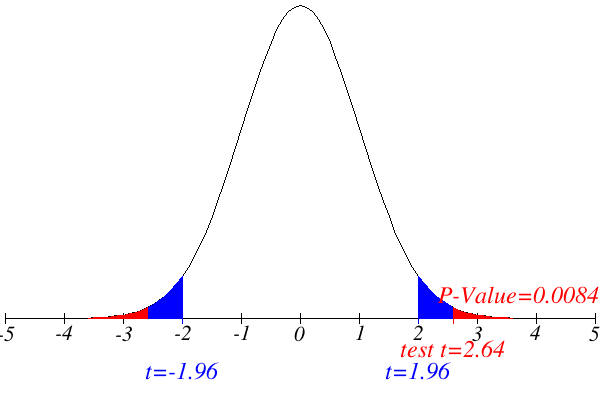

In [12]:
Image(filename='ttest.png', width = 550)

Wikipedia: https://en.wikipedia.org/wiki/Precision_and_recall

By Walber - Own work, CC BY-SA 4.0, https://commons.wikimedia.org/w/index.php?curid=36926283

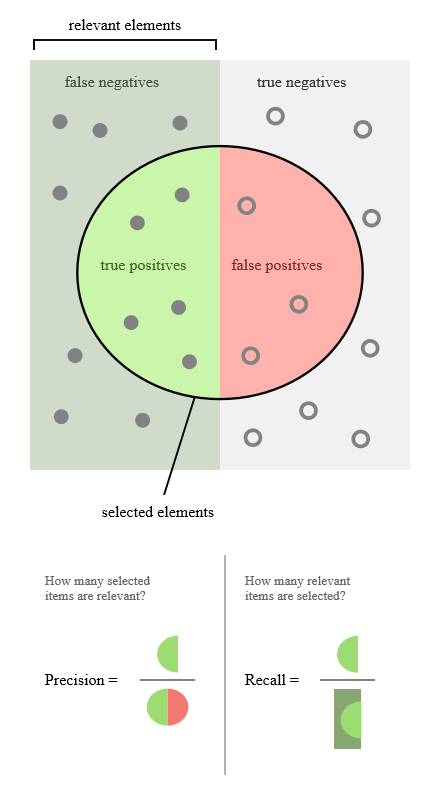

In [17]:
Image(filename='precisionrecall.png', width = 450)

$Precision = \dfrac{TP}{TP + FP}$

$Recall = \dfrac{TP}{TP + FN}$

$H_0$ : Negative

$H_1$ : Positive

Type I Error: Fail to accept $H_0$, False Positive, 3

Type II Error: Fail to reject $H_0$, False Negative, 7

#### Assumptions
Consistent if power goes to 1 as sample size grows to infinity.  Testing procedure is consistent if testing based on a consistent estimator.  For linear regression, LS is best linear unbiased estimator (BLUE).

Linear Regression Model Assumptions: LS is BLUE, effecient and consistent
1. Linearity: Linear relationship between y and X, linear in parameter, not variable, for example: log and higher order.
2. Full rank: no exact linear relationship among X, or multicollinearity, identification problem.  Test VIF.
3. Exogeneity of the independent variables: no correlation between X and $\epsilon$, biased and inconsistent, omitted variable bias.  Use instruments or lag...
4. iid disturbance, no autocorrelation between disturbance, and homoscedasticity or constant variance $\sigma^2$.  Use robust variance
5. Stochastic or nonstochastic data
6. Normal distribution of disturbances

In the above lending model, assumption 3 is violated, LS is not consistent anymore.  So use GMM.

5 & 6 might be relaxed for large sample, 1 - 4 are strong

Small sample, t test, disturbances normally distributed: Can carry the test result to parameter.  Population variance cannot be observed, use sample variance instead.  As sample size increase, quality of t statistics approximation improves, asymptotically normal, no need for normally distributed disturbance.  Central Limit Theorem.  Wald test, Z test or $\chi^2$ might be more efficient than t.

#### Coding Example for A Simple Regression using Bank Data

In [5]:
bank = pd.read_csv(r'C:\Users\zefan\Desktop\CapStone_Project\bank.csv')

In [8]:
bank.head()

,cert,name,stalp,sc,idlnls,intexpy,nonixay,rbc1aaj,rbc1rwaj,rbcrwaj,...,npl,cet1,yd09,yd13,q1,q2,q3,q4,stress,basel
0,9,Union Trust Company,ME,97811,214531,3.354426,3.635234,7.396668,12.90231,14.15748,...,2.075906,12.90231,0,0,0,0,0,1,0,0
1,9,Union Trust Company,ME,99982,219438,2.274367,3.377611,7.715183,13.33261,14.58879,...,1.144735,13.33261,0,0,1,0,0,0,0,0
2,9,Union Trust Company,ME,107207,224276,2.236159,3.517961,7.733468,13.39351,14.64933,...,0.872765,13.39351,0,0,0,1,0,0,0,0
3,9,Union Trust Company,ME,108398,229173,2.191243,3.500027,7.681346,13.29637,14.55234,...,1.249328,13.29637,0,0,0,0,1,0,0,0
4,9,Union Trust Company,ME,104355,231758,2.138290,3.620069,7.656856,13.66623,14.92180,...,1.994018,13.66623,0,0,0,0,0,1,0,0


In [11]:
bank.shape

(502954, 35)

In [9]:
bank.describe()

,cert,sc,idlnls,intexpy,nonixay,rbc1aaj,rbc1rwaj,rbcrwaj,rbct1cer,time,...,npl,cet1,yd09,yd13,q1,q2,q3,q4,stress,basel
count,502954.00000,5.029540e+05,5.029540e+05,502236.000000,502283.000000,502282.000000,502278.000000,502278.000000,93155.000000,502954.000000,...,502954.000000,502278.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000,502954.000000
mean,21556.28633,3.156285e+05,9.324236e+05,1.630615,3.539370,11.566651,21.404724,22.531715,18.466988,29.796226,...,1.819636,21.074640,0.484273,0.240557,0.250904,0.249049,0.247196,0.252852,0.008412,0.110207
std,16638.06825,5.740283e+06,1.456079e+07,3.141237,7.064994,21.622764,221.955190,221.947820,420.886827,18.135909,...,2.244437,229.765550,0.499753,0.427422,0.433534,0.432462,0.431382,0.434647,0.091332,0.313148
min,9.00000,-2.151900e+05,0.000000e+00,-0.044499,-6.054278,-519.469100,-2300.000000,-2300.000000,-12.459700,1.000000,...,0.000000,-33959.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9319.00000,9.448000e+03,3.794900e+04,0.679787,2.397687,8.399933,11.505750,12.651472,0.000000,14.000000,...,0.512319,11.452480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,17514.00000,2.500050e+04,8.796450e+04,1.512787,2.903993,9.730633,14.285140,15.419890,12.962200,29.000000,...,1.191045,14.235805,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30152.00000,6.472475e+04,2.151938e+05,2.384280,3.510888,11.855207,19.117432,20.212487,17.441650,45.000000,...,2.320510,19.095505,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,91363.00000,4.173600e+08,9.487640e+08,1880.000000,780.952400,8290.625000,74283.340000,74283.340000,74283.300000,64.000000,...,84.153990,74283.340000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [37]:
bank.isnull().any()

cert        False
name        False
stalp       False
sc          False
idlnls      False
intexpy      True
nonixay      True
rbc1aaj      True
rbc1rwaj     True
rbcrwaj      True
rbct1cer     True
time        False
fedfunds    False
unrate      False
lnloan      False
lnsc         True
lngdp        True
lncs         True
lnpi         True
grre         True
lnasset     False
lr          False
inf          True
profit       True
chr          True
npl         False
cet1         True
yd09        False
yd13        False
q1          False
q2          False
q3          False
q4          False
stress      False
basel       False
dtype: bool

In [67]:
len(bank[bank['cet1'].isnull() == True])

676

In [68]:
bank2 = bank.dropna(axis = 0, subset=['cet1'])

In [69]:
bank.shape

(502954, 35)

In [70]:
bank2.shape

(502278, 35)

In [71]:
y = np.array(bank2['idlnls'])

In [72]:
X = np.array(bank2[['cet1', 'npl']])

#### Using sklearn, calculate t and p by self?

In [73]:
lr = LinearRegression().fit(X, y)

In [74]:
lr.coef_

array([  -151.2831301 ,  46528.99414244])

In [75]:
lr.intercept_

849556.43423228431

#### Using stats model

In [86]:
Xc = sm.add_constant(X)

In [87]:
est = sm.OLS(y, Xc)

In [88]:
result = est.fit()

In [89]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     14.51
Date:                Fri, 18 May 2018   Prob (F-statistic):           5.02e-07
Time:                        16:06:25   Log-Likelihood:            -8.9975e+06
No. Observations:              502278   AIC:                         1.800e+07
Df Residuals:                  502275   BIC:                         1.800e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.496e+05   2.66e+04     31.981      0.000    7.97e+05    9.02e+05
x1          -151.2831     89.489     -1.691      0.091    -326.680      24.113
x2          4.653e+04   9158.843      5.080      0.000    2.86e+04    6.45e+04
==============================================================================
Omnibus:                  1473231.188   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      86190536821.533
Skew:                          41.652   Prob(JB):                         0.00
Kurtosis:                    2030.669   Cond. No.                         306.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Example from My Research

A Dynamic Bank Lending Regression Output From Stata, System GMM:

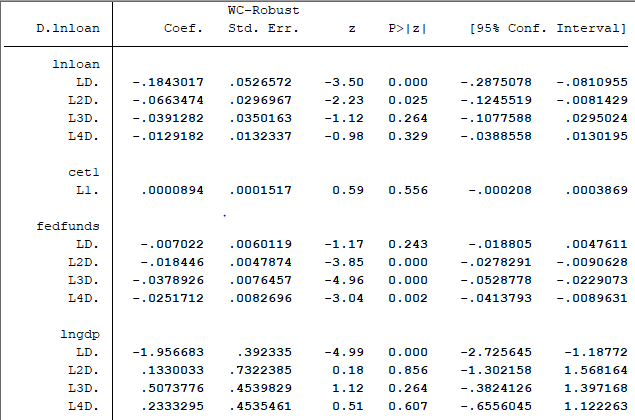

In [20]:
Image(filename='gmm.png', width = 600)

A Presentation Report:

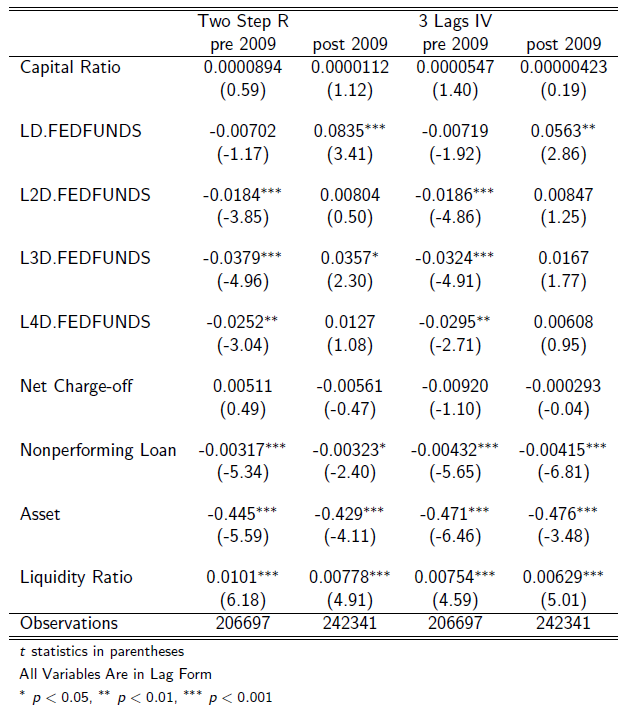

In [23]:
Image(filename='gmmp.png', width = 500)

## Bayesian Estimation

#### Another Method:
Neyman-Pearson: All-or-noting, establish testing rule, either reject or not.

What if the test statistics is close to the boundary?  Should we reject or not?  And cannot incorporate results from other studies.

Bayesian: Middle ground, update prior beliefs.  Combining evidence from before (prior beliefs) with the current evidence (data) to reach a new conclusion (posterior beliefs).

caution to use, have to pick prior, subjective, but all estimation are pretty subjective.

parametric and non-parametric, relax assumption, choose estimator that requires less assumption, advance of GMM, heterscadasticity, likelihood based, GMM, Bayesian estimation.  Full, semi, to non-parametric estimation.  Relax assumption, but at a cost of weak conclusion from data.